In [93]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset/data

## Load Data

In [40]:
ALL_PRODUCTS_FILEPATH = Path.cwd() / '..' / 'amazon_data_files' / 'Amazon-Products.csv'
AIR_CONDITIONERS_FILEPATH = Path.cwd() / '..' / 'amazon_data_files' / 'Air Conditioners.csv'

In [41]:
all_products = pd.read_csv(ALL_PRODUCTS_FILEPATH)
all_products

,Unnamed: 0,Name,main Category,Sub category,image,link,ratings,no of Ratings,discount price,actual price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


### Dealing with column names

In [42]:
# Drop columns not providing important information
all_products = all_products.drop('Unnamed: 0', axis=1)

In [43]:
# Keep all column names in same format
all_products.columns = all_products.columns.str.lower().str.strip().str.replace(' ','_')

In [44]:
all_products.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [45]:
# Number of columns and rows
all_products.shape

(551585, 9)

## Data Cleaning


### Checking for Missing Data

In [46]:
all_products.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [47]:
all_products.isnull().mean()

name              0.000000
main_category     0.000000
sub_category      0.000000
image             0.000000
link              0.000000
ratings           0.318707
no_of_ratings     0.318707
discount_price    0.110886
actual_price      0.032294
dtype: float64

In [48]:
# Identifying columns in the dataframe where over 80% of the values are missing
all_products.columns[all_products.isnull().mean() > 0.8]

# There is no columns with more than 80% of data with missing values so there's no need to filter out any column

Index([], dtype='object')


### Checking for Data Types

In [49]:
all_products.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"


In [50]:
# Displaying the data types of each column in the dataframe
all_products.dtypes

name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

The last 4 column should be numerical, however, discount_price and actual_price containg non-numerical characters that need to be removed. After that they can be converted to float values.

In [51]:
# Remove '₹' symbol:
all_products['discount_price'] = all_products['discount_price'].str.split('₹').str[1]
all_products['actual_price'] = all_products['actual_price'].str.split('₹').str[1]


In [52]:
# Remove commas and convert to float values
all_products['discount_price'] = all_products['discount_price'].str.replace(',', '').astype(float)
all_products['actual_price'] = all_products['actual_price'].str.replace(',', '').astype(float)


In [53]:
# Convert ratings and no_of_ratings to float values. Let's see first what kind of values they contain
all_products['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [54]:
# The following values: 'Get','FREE','₹68.99', '₹65','₹70', '₹100', '₹99', '₹2.99' need to be removed. Let's see in how many rows they appear

search_values = ['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99']

occurrences = {}
for value in search_values:
    occurrences[value] = all_products['ratings'].str.contains(value).sum()

# Print the occurrences
for key, value in occurrences.items():
    print(f"Occurrences of '{key}' in 'ratings' is: {value}")


Occurrences of 'Get' in 'ratings' is: 4852
Occurrences of 'FREE' in 'ratings' is: 1357
Occurrences of '₹68.99' in 'ratings' is: 1
Occurrences of '₹65' in 'ratings' is: 1
Occurrences of '₹70' in 'ratings' is: 5
Occurrences of '₹100' in 'ratings' is: 1
Occurrences of '₹99' in 'ratings' is: 14
Occurrences of '₹2.99' in 'ratings' is: 2


The number of rows represent less than 10% of total number of rows, so let's remove them

In [55]:
df_to_remove = all_products['ratings'].astype(str).str.contains('|'.join(search_values))  # '|' joins the elements of the search_values list into a single string separated by '|'. astype(str) is to avoid problems using ~ later

# Filter the DataFrame to exclude rows with any of the search values in the 'ratings' column:
all_products = all_products[~df_to_remove]
all_products['ratings'] = all_products['ratings'].astype(float)
all_products['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, nan, 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5, 1.1])

In [56]:
all_products['no_of_ratings'] = all_products['no_of_ratings'].str.replace(',','').astype(float)

In [57]:
all_products.dtypes

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object

## EDA

From a customer perspective, the most important columns are: 1) Price 2) Rating 3) Manufacturer 4) Description 5) Customer reviews\
Since price and rating are crucial in our further analysis, let's drop missing values the corresponding columns. 

In [58]:
all_products.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     60647
actual_price       17813
dtype: int64

In [59]:
all_products2 = all_products.dropna(subset=['ratings','no_of_ratings','discount_price','actual_price'])
all_products2.isnull().sum()


name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

### Extract manufacturer information

Manufacturer column can be created from information in name column.

In [60]:
all_products2.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0


In [61]:
all_products2['manufacturer'] = all_products2['name'].str.split(' ').str[0]
all_products2.head(2)

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\2160737375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_products2['manufacturer'] = all_products2['name'].str.split(' ').str[0]


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,Lloyd
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,LG


In [62]:
# It is more convenient to have the manufacturer column at the beginning of the dataframe
cols = all_products2.columns.tolist()
cols

['name',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
 'manufacturer']

In [63]:
cols = ['name',
 'manufacturer',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price']

In [64]:
all_products2 = all_products2[cols]
all_products2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            334963 non-null  object 
 1   manufacturer    334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  float64
 9   actual_price    334963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 28.1+ MB


### Extract the net discount amount and discount percentage

In [67]:
all_products2['net_discount'] = all_products2['actual_price'] - all_products2['discount_price']
all_products2['discount_percent'] = 1 - all_products2['discount_price']/all_products2['actual_price']
all_products2.head(2)

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,25991.0,0.440600
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,29500.0,0.388209


### Info about manufactures and their prices

In [71]:
# Manufactures and their average product prices
all_products2.groupby('manufacturer').agg(mean_price = ('actual_price','mean')).sort_values(by='mean_price', ascending=False)

,mean_price
manufacturer,
Marutivilla,4.950001e+09
DENON,2.129000e+05
IMALENT,1.900000e+05
XGIMI,1.899077e+05
Mijia,1.849990e+05
...,...
Too,2.000000e+01
"Sprite,",2.000000e+01
Bingo!,1.000000e+01


In [79]:
# Most expensive product
all_products2[all_products2['actual_price'] == all_products2['actual_price'].max()]#['name']

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
194625,"Marutivilla Insect Killer, Mosquito Killer Lig...",Marutivilla,home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09,9.899999e+09,1.0


In [82]:
# Cheapest product/products
all_products2[all_products2['actual_price'] == all_products2['actual_price'].min()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
23172,"Bingo! Tedhe Medhe Masala Tadka, 50g, Spindle ...",Bingo!,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bingo-Tedhe-Medhe-Masala...,4.5,289.0,9.0,10.0,1.0,0.1
124233,"BRU Instant Coffee Sachet,Ground, 8g",BRU,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61nqvhwCKp...,https://www.amazon.in/BRU-Instant-Coffee-Sache...,4.0,7.0,8.0,10.0,2.0,0.2
268602,Rin Detergent Bar - 165g,Rin,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/81ufvQZfLH...,https://www.amazon.in/RIN-Invictus_RiDBa165g-R...,4.0,44.0,9.0,10.0,1.0,0.1
437600,"Kurkure Yummy Cheese Puffcorn Namkeen, 28g",Kurkure,grocery & gourmet foods,Snack Foods,https://m.media-amazon.com/images/I/71SjZUrMws...,https://www.amazon.in/Kurkure-Yummy-Cheese-Puf...,4.4,1485.0,9.0,10.0,1.0,0.1
437604,"Lay's Potato Chips 24g/27g, West Indies Hot 'n...",Lay's,grocery & gourmet foods,Snack Foods,https://m.media-amazon.com/images/I/718mIkrmCf...,https://www.amazon.in/Lays-Sweet-Chilli-Potato...,4.3,864.0,9.0,10.0,1.0,0.1
437916,"Cadbury Oreo Original Vanilla Creme Biscuit, 4...",Cadbury,grocery & gourmet foods,Snack Foods,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Cadbury-Oreo-Vanilla-Cr%...,4.4,1353.0,9.0,10.0,1.0,0.1


### TOP10 Most popular manufacturers:

In [92]:
top10_manufacturers = all_products2['manufacturer'].value_counts().keys().to_list()[:10]
top10_values = all_products2['manufacturer'].value_counts().to_list()[:10]

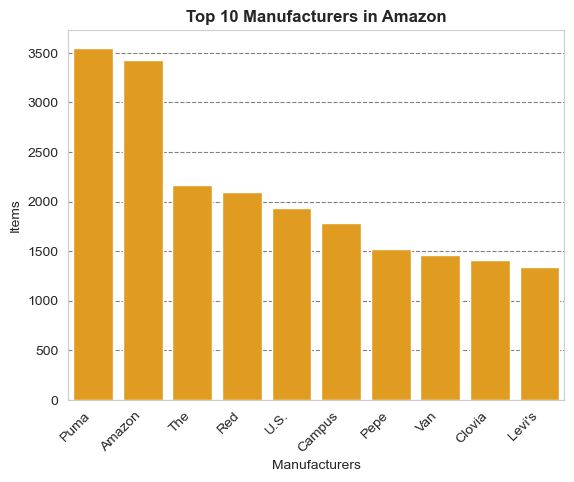

In [123]:
sns.barplot(x = top10_manufacturers, y = top10_values, color='orange', zorder = 2)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder = 1, color='black')
plt.xlabel('Manufacturers')
plt.ylabel('Items')
plt.title('Top 10 Manufacturers in Amazon', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

According to the bar chart above, Puma is the most popular manufacturer.

### Average rating in top 10 manufacturers:

In [127]:
# Creating a dataframe with TOP10 manufacterers:
all_products2[all_products2['manufacturer'].isin(top10_manufacturers)]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
65,"Amazon Basics 1 Ton, 5 Star, Wi-Fi Enabled Sma...",Amazon,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.6,88.0,28990.00,49089.0,20099.00,0.409440
83,"Amazon Basics 1.5 Ton, 5 Star, Wi-Fi Enabled S...",Amazon,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.4,39.0,34990.00,56179.0,21189.00,0.377169
112,Amazon Basics 1 Ton 4 Star Fixed Speed Window ...,Amazon,appliances,Air Conditioners,https://m.media-amazon.com/images/I/91BcgKPL5x...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.5,14.0,25490.00,33990.0,8500.00,0.250074
803,The Earth Store Handheld Coffee Frother Electr...,The,appliances,All Appliances,https://m.media-amazon.com/images/I/51+vA2qAe9...,https://www.amazon.in/Earth-Store-Coffee-Froth...,4.1,1944.0,225.00,499.0,274.00,0.549098
970,The Better Home Lint Roller for Clothes | Wood...,The,appliances,All Appliances,https://m.media-amazon.com/images/I/31J-ca1u8l...,https://www.amazon.in/Better-Home-Clothes-Remo...,4.1,190.0,265.00,899.0,634.00,0.705228
...,...,...,...,...,...,...,...,...,...,...,...,...
551518,Puma Men's Jacket,Puma,sports & fitness,Yoga,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Puma-Mens-Track-Jacket-5...,2.8,2.0,2999.00,4999.0,2000.00,0.400080
551519,Puma Men Track Jacket,Puma,sports & fitness,Yoga,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Puma-Track-Jacket-595430...,4.0,6.0,4549.00,6999.0,2450.00,0.350050
551525,Puma Men's Jacket,Puma,sports & fitness,Yoga,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Puma-Mens-Track-Jacket-5...,4.2,58.0,3949.00,4999.0,1050.00,0.210042
551544,Puma Women's Car Coat,Puma,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51DT-7f3yG...,https://www.amazon.in/Puma-Womens-Nylon-Jacket...,5.0,2.0,3369.00,4499.0,1130.00,0.251167
